# Importar bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# 1.Importar base de dados

In [ ]:
uri="https://raw.githubusercontent.com/FelipeRamosOliveira/DataFrames/master/tips.csv"
dados=pd.read_csv(uri)
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Tratar dados

In [ ]:
# Mudar nome das colunas
dados.columns=['conta_total','gorjeta','sobremesa','dia','periodo','pessoas']

#Traduzir dados
troca_sobremesa={'No':'Nao','Yes':'Sim'}
troca_periodo={'Dinner':'Jantar','Lunch':'Almoco'}
troca_dia={'Sun':'Dom', 'Sat':'Sab', 'Thur':'Quin', 'Fri':'Sex'}

dados.sobremesa=dados.sobremesa.map(troca_sobremesa)
dados.periodo=dados.periodo.map(troca_periodo)
dados.dia=dados.dia.map(troca_dia)
dados.tail()

#Adicionar coluna extra
dados['percentual']=dados.gorjeta/dados.conta_total
dados.tail()


,conta_total,gorjeta,sobremesa,dia,periodo,pessoas,percentual
239,29.03,5.92,Nao,Sab,Jantar,3,0.203927
240,27.18,2.00,Sim,Sab,Jantar,2,0.073584
241,22.67,2.00,Sim,Sab,Jantar,2,0.088222
242,17.82,1.75,Nao,Sab,Jantar,2,0.098204
243,18.78,3.00,Nao,Quin,Jantar,2,0.159744


# 2.Valor da conta e gorjeta

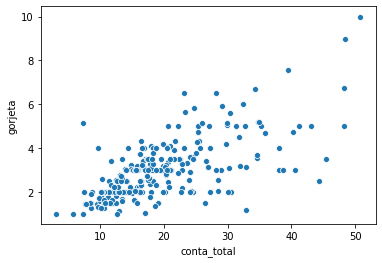

In [ ]:
primeiro_plot=sns.scatterplot(x='conta_total',y='gorjeta',data=dados)

* O valor da gorjeta é diretamente proporcional ao valor da conta

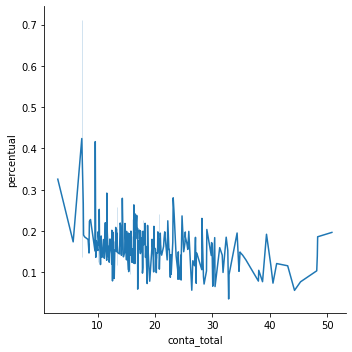

In [ ]:
segundo_plot=sns.relplot(x='conta_total',y='percentual',kind='line',data=dados)

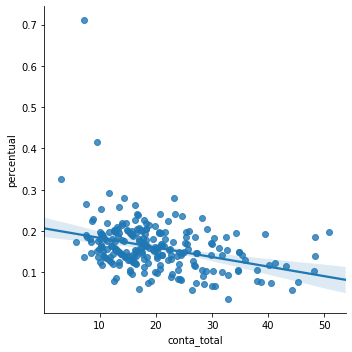

In [ ]:
terceiro_plot=sns.lmplot(x='conta_total',y='percentual',data=dados)

Adicionar subtitulos os gráficos

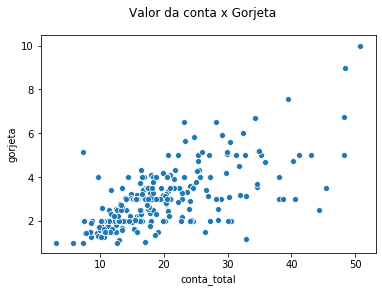

In [ ]:
primeiro_plot.figure.suptitle('Valor da conta x Gorjeta')
primeiro_plot.get_figure()

Adicionar título os gráficos

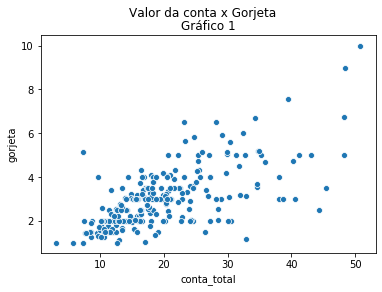

In [ ]:
primeiro_plot.set_title('Gráfico 1')
primeiro_plot.get_figure()

Mudar título dos eixos

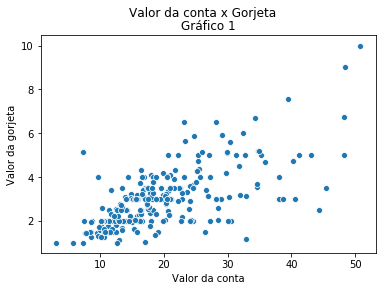

In [ ]:
primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
primeiro_plot.get_figure()

Salvar imagem

In [ ]:
imagem = primeiro_plot.get_figure()
imagem.savefig('imagem.png')

# 3.Sobremesa

In [ ]:
sobrmesa_sim=dados.query("sobremesa=='Sim'").describe()
sobrmesa_sim

,conta_total,gorjeta,pessoas,percentual
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163196
std,9.832154,1.401468,0.810751,0.085119
min,3.070000,1.000000,1.000000,0.035638
25%,13.420000,2.000000,2.000000,0.106771
50%,17.920000,3.000000,2.000000,0.153846
75%,26.860000,3.680000,3.000000,0.195059
max,50.810000,10.000000,5.000000,0.710345


In [ ]:
sobrmesa_nao=dados.query("sobremesa=='Nao'").describe()
sobrmesa_nao

,conta_total,gorjeta,pessoas,percentual
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159328
std,8.255582,1.377190,1.017984,0.039910
min,7.250000,1.000000,1.000000,0.056797
25%,13.325000,2.000000,2.000000,0.136906
50%,17.590000,2.740000,2.000000,0.155625
75%,22.755000,3.505000,3.000000,0.185014
max,48.330000,9.000000,6.000000,0.291990


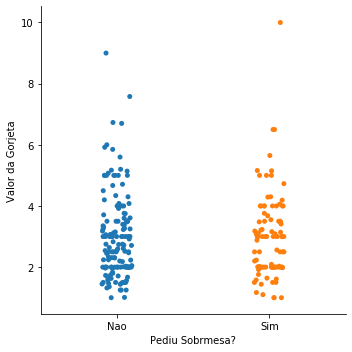

In [ ]:
quarto_plot=sns.catplot(x='sobremesa',y='gorjeta',data=dados)
quarto_plot.set(xlabel='Pediu Sobrmesa?', ylabel='Valor da Gorjeta')

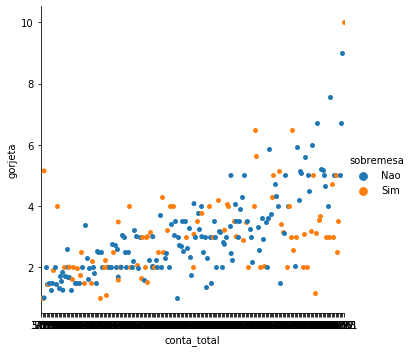

In [ ]:
quinto_plot=sns.catplot(x='conta_total', y='gorjeta',hue='sobremesa',data=dados)

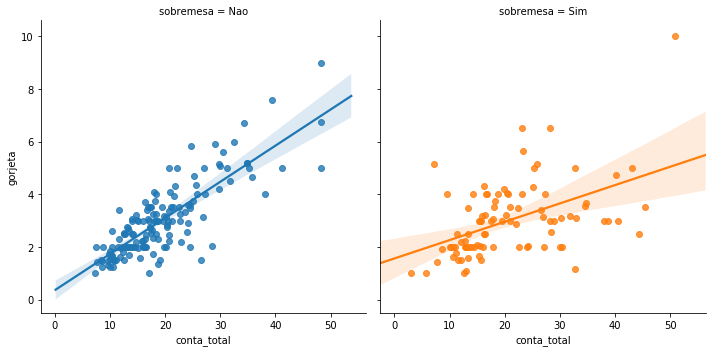

In [ ]:
quinto_plot=sns.lmplot(x='conta_total',y='gorjeta',col='sobremesa',hue='sobremesa',data=dados)

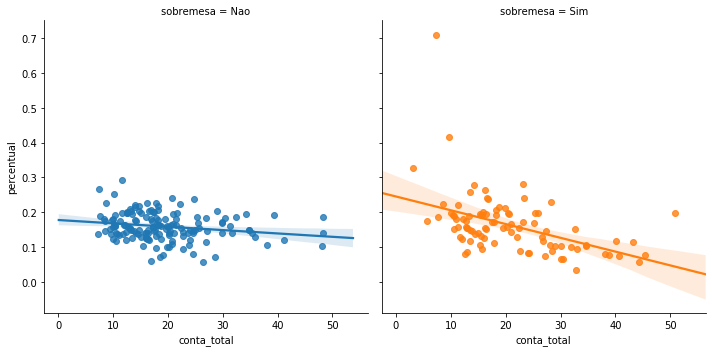

In [ ]:
sexto_plot=sns.lmplot(x='conta_total',y='percentual',col='sobremesa',hue='sobremesa',data=dados)

* Nota-se uma diferença entre a gorjeta de quem pediu sobremesa e quem não pediu

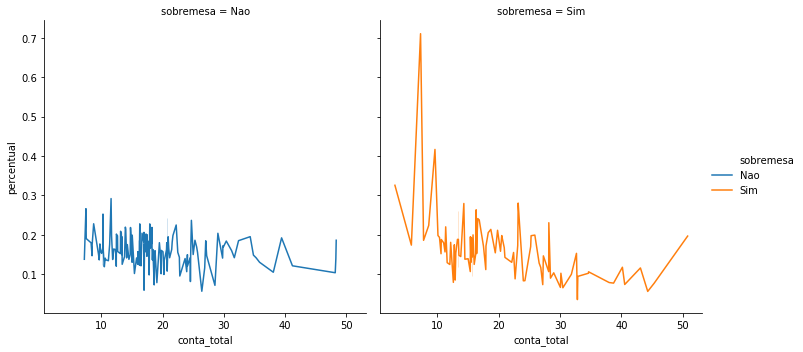

In [ ]:
setimo_plot=sns.relplot(x='conta_total',y='percentual',col='sobremesa',hue='sobremesa',kind='line',data=dados)

# 4.Teste de hipótese

**H<sup>0** **- Hipótese nula**
>A taxa de gorjeta **é** igual nos dois grupos

**H<sup>alt** **- Hipótese alternativa**
>A taxa de gorjeta **não é** igual nos dois grupos

In [ ]:
sobremesa_sim=dados.query("sobremesa=='Sim'").percentual
sobremesa_nao=dados.query("sobremesa=='Nao'").percentual

In [ ]:
R=ranksums(sobremesa_sim,sobremesa_nao)
print('O valor do p-valor é de {}'.format(R.pvalue))

O valor do p-valor é de 0.5601068283978767


**H<sup>0** **- Hipótese nula**
>A taxa de gorjeta **é** igual nos dois grupos


# 5.Dia da semana

In [ ]:
dados.head()

,conta_total,gorjeta,sobremesa,dia,periodo,pessoas,percentual
0,16.99,1.01,Nao,Dom,Jantar,2,0.059447
1,10.34,1.66,Nao,Dom,Jantar,3,0.160542
2,21.01,3.50,Nao,Dom,Jantar,3,0.166587
3,23.68,3.31,Nao,Dom,Jantar,2,0.139780
4,24.59,3.61,Nao,Dom,Jantar,4,0.146808


In [ ]:
dados.dia.unique()

array(['Dom', 'Sab', 'Quin', 'Sex'], dtype=object)

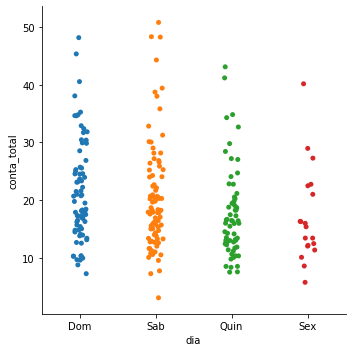

In [ ]:
plot_8=sns.catplot(x='dia',y='conta_total',data=dados)

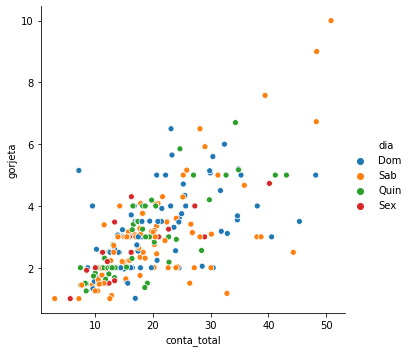

In [ ]:
plot_9=sns.relplot(x='conta_total',y='gorjeta',hue='dia',data=dados)

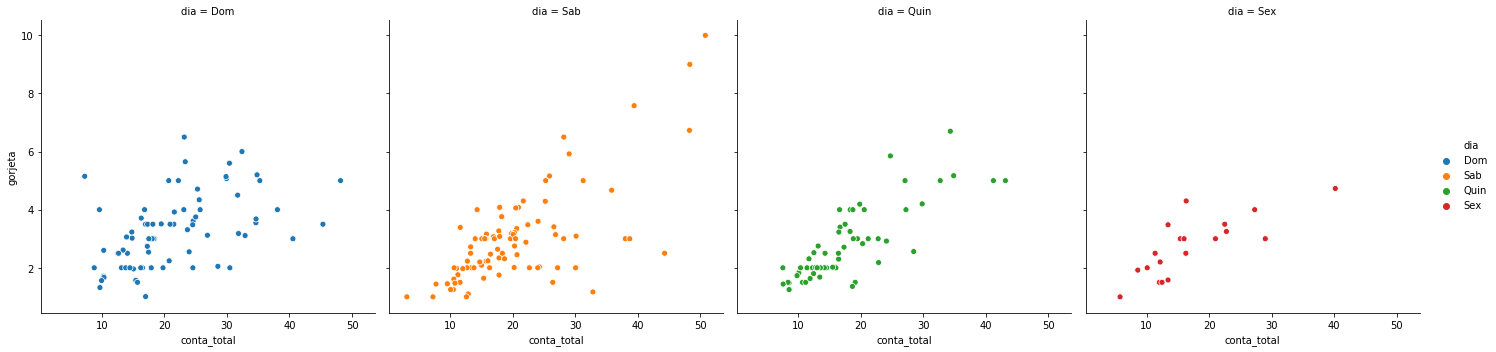

In [ ]:
plot_10=sns.relplot(x='conta_total',y='gorjeta',hue='dia',col='dia',data=dados)

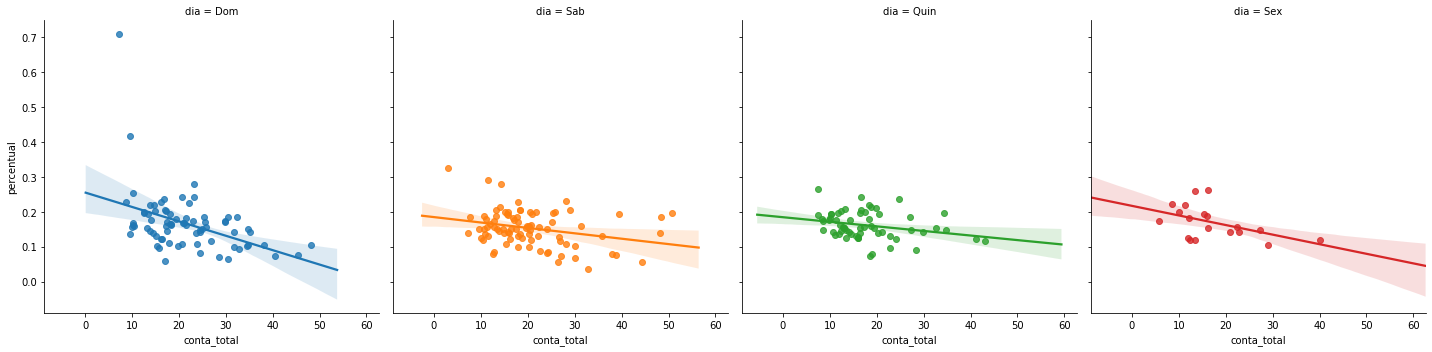

In [ ]:
plot_11=sns.lmplot(x='conta_total',y='percentual',col='dia',hue='dia',data=dados)

In [ ]:
print('Estatítica geral das gorjetas')
dados.gorjeta.describe()

Estatítica geral das gorjetas


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: gorjeta, dtype: float64

In [ ]:
print('Média por dia')
dados.groupby(['dia']).mean()[['conta_total','gorjeta','percentual']]

Média por dia


,conta_total,gorjeta,percentual
dia,,,
Dom,21.410000,3.255132,0.166897
Quin,17.682742,2.771452,0.161276
Sab,20.441379,2.993103,0.153152
Sex,17.151579,2.734737,0.169913


In [ ]:
print('Frequência dos dias')
dados.dia.value_counts()

Frequência dos dias


Sab     87
Dom     76
Quin    62
Sex     19
Name: dia, dtype: int64

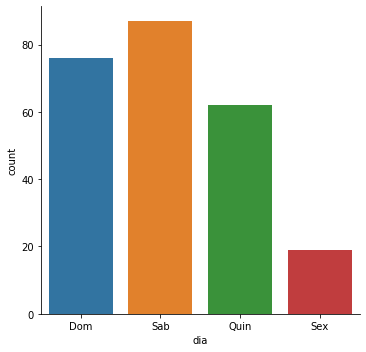

In [ ]:
plot_12=sns.catplot(x='dia',kind='count', data=dados)

# 6.Teste de hipótese

**H<sup>0** **- Hipótese nula**
>A distribuição do valor da conta **é** igual no sábado e no domingo

**H<sup>alt** **- Hipótese alternativa**
>A distribuição do valor da conta **não é** igual no sábado e no domingo

In [ ]:
conta_dom=dados.query("dia=='Dom'").conta_total
conta_sab=dados.query("dia=='Sab'").conta_total

In [ ]:
R2=ranksums(conta_dom,conta_sab)
print('O valor do p-valor é de %.2f'% R2.pvalue)

O valor do p-valor é de 0.36


**H<sup>0** **- Hipótese nula**
>A distribuição do valor da conta **é** igual no sábado e no domingo

# 7.Periodo

In [ ]:
dados.periodo.unique()

array(['Jantar', 'Almoco'], dtype=object)

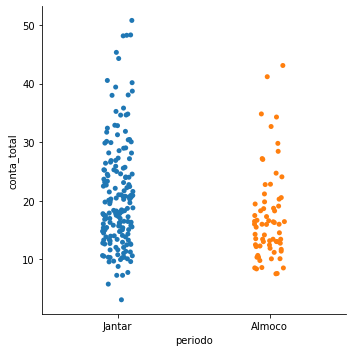

In [ ]:
plot_13=sns.catplot(x='periodo',y='conta_total',data=dados)

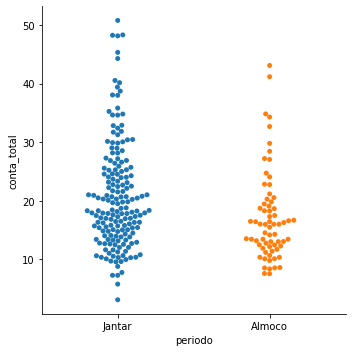

In [ ]:
plot_14=sns.catplot(x='periodo',y='conta_total',kind='swarm',data=dados)

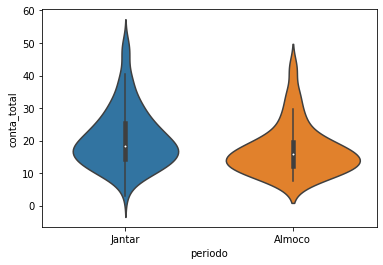

In [ ]:
plot_15=sns.violinplot(x='periodo',y='conta_total',data=dados)

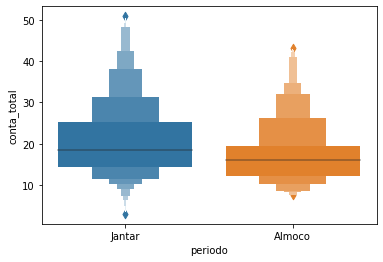

In [ ]:
plot_16=sns.boxenplot(x='periodo',y='conta_total',data=dados)

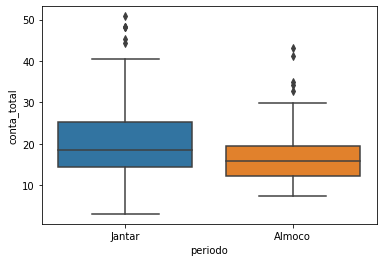

In [ ]:
plot_17=sns.boxplot(x='periodo',y='conta_total',data=dados)

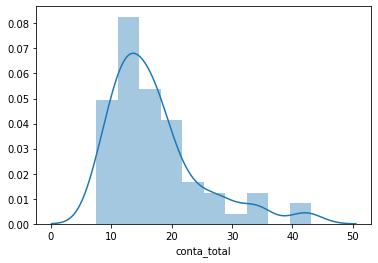

In [ ]:
dados_almoco=dados.query("periodo=='Almoco'").conta_total
sns.distplot(dados_almoco)

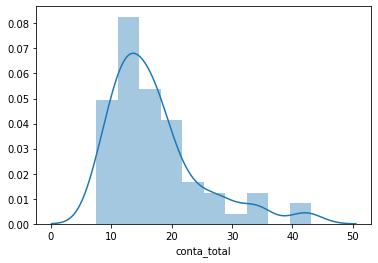

In [ ]:
sns.distplot(dados_almoco,kde='False')

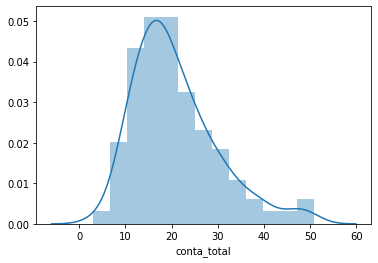

In [ ]:
dados_jantar=dados.query("periodo=='Jantar'").conta_total
sns.distplot(dados_jantar)

In [ ]:
dados.groupby(['periodo']).mean()[['conta_total','gorjeta','percentual']]

,conta_total,gorjeta,percentual
periodo,,,
Almoco,17.168676,2.728088,0.164128
Jantar,20.797159,3.102670,0.159518


# 8.Teste de hipótese

**H<sup>0<sup>** **- Hipótese nula**
>A distribuição do valor das contas **é** igual no jantar e almoço

**H<sup>alt<sup>** **- Hipótese alternativa**
>A distribuição do valor das contas **não é** igual no jantar e almoço

In [ ]:
R3=ranksums(dados_jantar,dados_almoco)
print('O valor do p-valor é de %.2f'% R3.pvalue)

O valor do p-valor é de 0.00


**H<sup>alt<sup>** **- Hipótese alternativa**
>A distribuição do valor das contas **não é** igual no jantar e almoço

In [ ]:
percent_almoco=dados.query("periodo=='Almoco'").percentual
percent_jantar=dados.query("periodo=='Jantar'").percentual

* Segundo teste

**H<sup>0<sup>** **- Hipótese nula**
>A distribuição  da taxa de gorjeta **é** igual no jantar e almoço

**H<sup>alt<sup>** **- Hipótese alternativa**
>A distribuição da taxa de gorjetas **não é** igual no jantar e almoço

In [ ]:
R4=ranksums(percent_jantar,percent_almoco)
print('O valor do p-valor é de %.2f'% R4.pvalue)

O valor do p-valor é de 0.23


**H<sup>0<sup>** **- Hipótese nula**
>A distribuição  da taxa de gorjeta **é** igual no jantar e almoço